In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
telecom_df=pd.read_csv("/content/telecom_df.csv")

In [9]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TowerID                5050 non-null   int64  
 1   Location               5050 non-null   object 
 2   Operator               5050 non-null   object 
 3   Band                   5050 non-null   object 
 4   Traffic                5050 non-null   float64
 5   Uptime                 5050 non-null   float64
 6   Faults                 5050 non-null   int64  
 7   Faults_Class           5050 non-null   object 
 8   Uptime_Class           5050 non-null   object 
 9   Traffic_per_Fault      5050 non-null   float64
 10  Downtime               5050 non-null   float64
 11  Fault_Severity_Index   5050 non-null   float64
 12  Log_Traffic            5050 non-null   float64
 13  Log_Downtime           5050 non-null   float64
 14  Log_Traffic_per_Fault  5050 non-null   float64
 15  Upti

In [6]:
telecom_df.head()

,TowerID,Location,Operator,Band,Traffic,Uptime,Faults,Faults_Class,Uptime_Class,Traffic_per_Fault,...,Fault_Severity_Index,Log_Traffic,Log_Downtime,Log_Traffic_per_Fault,Uptime_Traffic,Traffic_per_Downtime,Traffic_Squared,Uptime_Squared,Traffic_Bin,Uptime_Bin
0,1,West,Operator2,800 MHz,72.53,94.71,2,High,Low Uptime,36.265,...,3.645,4.297693,1.838961,3.618055,6869.3163,13.710775,5260.6009,8969.9841,Low,Medium
1,2,North,Operator2,800 MHz,77.58,93.61,2,High,Low Uptime,38.790,...,4.195,4.364117,2.000128,3.683616,7262.2638,12.140845,6018.6564,8762.8321,Low,Medium
2,3,Central,Operator3,2100 MHz,96.94,94.29,1,Low,Low Uptime,96.940,...,3.355,4.584355,1.903599,4.584355,9140.4726,16.977233,9397.3636,8890.6041,Medium,Medium
3,4,Central,Operator3,1800 MHz,101.87,98.55,2,High,High Uptime,50.935,...,1.725,4.633466,0.896088,3.949993,10039.2885,70.255172,10377.4969,9712.1025,High,High
4,5,East,Operator1,2300 MHz,72.89,88.82,2,High,Low Uptime,36.445,...,6.590,4.302578,2.499795,3.622873,6474.0898,6.519678,5312.9521,7888.9924,Low,Low


In [7]:
#handling missing values
telecom_df['Location']=telecom_df['Location'].fillna(telecom_df['Location'].mode()[0])
telecom_df['Operator']=telecom_df['Operator'].fillna(telecom_df['Operator'].mode()[0])
telecom_df['Band']=telecom_df['Band'].fillna(telecom_df['Band'].mode()[0])
telecom_df['Log_Traffic']=telecom_df['Log_Traffic'].fillna(telecom_df['Log_Traffic'].mean())
telecom_df['Log_Downtime']=telecom_df['Log_Downtime'].fillna(telecom_df['Log_Downtime'].mean())
telecom_df['Uptime_Bin']=telecom_df['Uptime_Bin'].fillna(telecom_df['Uptime_Bin'].mode()[0])

In [8]:
telecom_df.isnull().sum()

,0
TowerID,0
Location,0
Operator,0
Band,0
Traffic,0
Uptime,0
Faults,0
Faults_Class,0
Uptime_Class,0
Traffic_per_Fault,0


In [10]:
#select numeric columns


In [11]:
print(numeric_columns)

Index(['TowerID', 'Traffic', 'Uptime', 'Faults', 'Traffic_per_Fault',
       'Downtime', 'Fault_Severity_Index', 'Log_Traffic', 'Log_Downtime',
       'Log_Traffic_per_Fault', 'Uptime_Traffic', 'Traffic_per_Downtime',
       'Traffic_Squared', 'Uptime_Squared'],
      dtype='object')


In [12]:
#calculate the number of rows and columns


In [26]:
num_rows

5

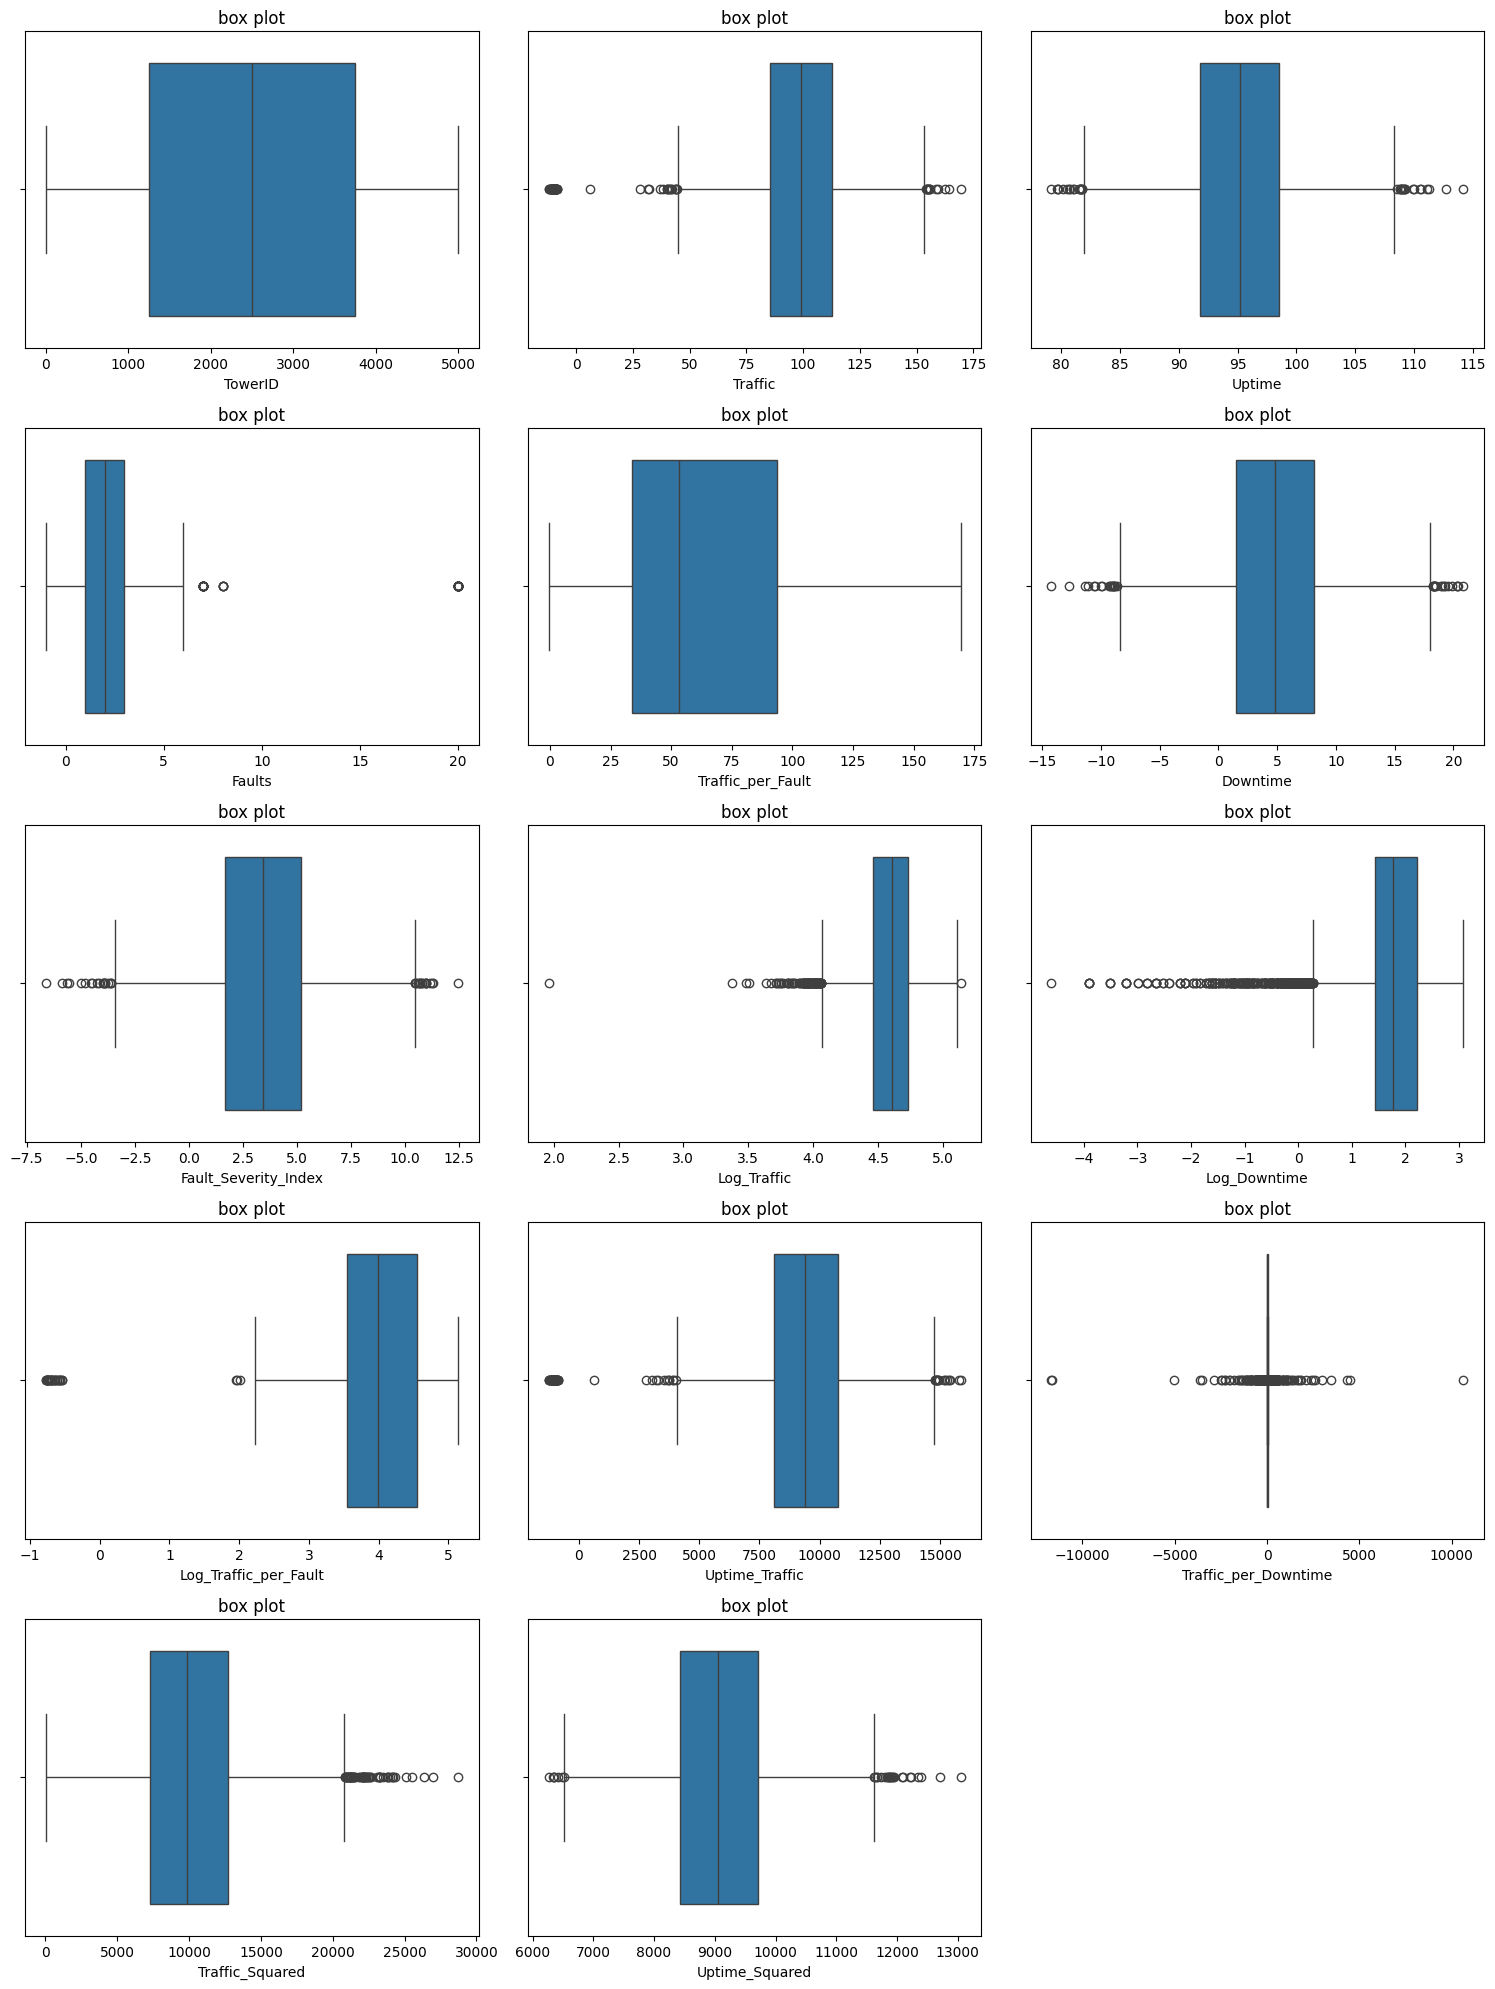

In [29]:
numeric_columns=telecom_df.select_dtypes(include=['float64','int64']).columns

num_columns=3
num_rows=int(np.ceil(len(numeric_columns)/num_columns))

fig, axes = plt.subplots(nrows=num_rows,ncols=num_columns,figsize=(15,4*num_rows))
axes=axes.flatten()

#loop through each numeric columns and plot the respective subplots
for i, column in enumerate(numeric_columns):
  sns.boxplot(x=telecom_df[column],ax=axes[i])
  axes[i].set_title("box plot")
  axes[i].set_xlabel(column)

for i in range(len(numeric_columns), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [31]:
#Capping(Clipping) to identify and treat outliers

for column in numeric_columns:
    Q1=telecom_df[column].quantile(0.25)
    Q3=telecom_df[column].quantile(0.75)

    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR #any value less than this is an outlier
    upper_bound=Q3+1.5*IQR #any value more than this is an outlier

    #capping the outliers
    telecom_df[column]=np.where(telecom_df[column]<lower_bound,lower_bound,
                                np.where(telecom_df[column]>upper_bound, upper_bound,telecom_df[column]))

In [36]:
#Correlation HeatMap
#Number of rooms - is more then size of each room will be less (if we have fixed area of land)
matrix=telecom_df[['Traffic','Faults','Uptime','Downtime','Log_Traffic','Traffic_per_Fault']].corr()

In [37]:
print(matrix)

                    Traffic    Faults    Uptime  Downtime  Log_Traffic  \
Traffic            1.000000 -0.033108 -0.071094  0.071094     0.958092   
Faults            -0.033108  1.000000  0.003311 -0.003311    -0.016417   
Uptime            -0.071094  0.003311  1.000000 -1.000000    -0.019104   
Downtime           0.071094 -0.003311 -1.000000  1.000000     0.019104   
Log_Traffic        0.958092 -0.016417 -0.019104  0.019104     1.000000   
Traffic_per_Fault  0.405421 -0.807044 -0.029469  0.029469     0.371354   

                   Traffic_per_Fault  
Traffic                     0.405421  
Faults                     -0.807044  
Uptime                     -0.029469  
Downtime                    0.029469  
Log_Traffic                 0.371354  
Traffic_per_Fault           1.000000  


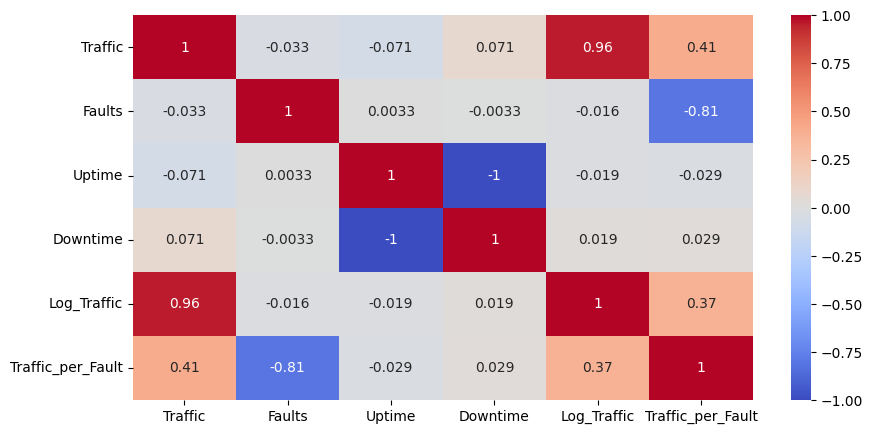

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix,annot=True,cmap='coolwarm')
plt.show()